# Setup and imports

In [ ]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from pathlib import Path
from tqdm import tqdm
import czifile
from csbdeep.utils import normalize

c:\Users\albertds\mambaforge\envs\EMBL_keras\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\albertds\mambaforge\envs\EMBL_keras\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\albertds\mambaforge\envs\EMBL_keras\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
def read_image(fname):
    x = czifile.imread(fname)
    x = np.squeeze(x, axis=3)
    x = np.moveaxis(x, 0, -1)
    return x

# Load test images

In [ ]:
test_img_directory = Path("Zeiss_Raw_Test")
#Check if input images are accesible
!ls {test_img_directory}
f_test_images = sorted(test_img_directory.glob("*.czi"))
print(f'found {len(f_test_images)} test images')

test_imgs = tuple(normalize(read_image(f), axis=(0,1)) for f in tqdm(f_test_images))

1743I_10X_OP_LGR5GFP_BCAT_DAPI_LSD1_HQ.czi
1800I_10X_OP_LGR5GFP_BCAT_DAPI_LSD1_HQ.czi
found 2 test images


100%|██████████| 2/2 [00:11<00:00,  5.80s/it]


# Load the model

In [ ]:
import model as M

In [ ]:
# Define the model_name you want to use from the models folder
model_name = 'model1_epoch5'
# Load the different models here by changing the model name
model = M.UNet(None, model_name, basedir='models')

Loading network weights from 'weights_best.h5'.


In [ ]:
model

UNet(model1_epoch5): XYC → XYC
├─ Directory: C:\Users\albertds\Python_scripts\Semantic_segmentation EMBL\models\model1_epoch5
└─ UNetConfig(n_dim=2, axes='XYC', n_channel_in=4, n_channel_out=3, train_checkpoint='weights_best.h5', train_checkpoint_last='weights_last.h5', train_checkpoint_epoch='weights_now.h5', probabilistic=False, unet_residual=False, unet_n_depth=2, unet_kern_size=3, unet_n_first=32, unet_last_activation='softmax', unet_input_shape=[None, None, 4], train_loss='categorical_crossentropy', train_epochs=100, train_steps_per_epoch=400, train_learning_rate=0.0004, train_batch_size=4, train_tensorboard=True, train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0}, train_class_weight=[1, 1, 1], unet_batch_norm=False, unet_dropout=0.0, patch_size=[512, 512])

# Apply model to obtain predictions

In [ ]:
predictions = []
for img in test_imgs:
    prediction = model.predict(img, axes='XYC', n_tiles=(8,8,1))
    predictions.append(prediction)
    print(prediction.shape)

c:\Users\albertds\mambaforge\envs\EMBL_keras\lib\site-packages\csbdeep\models\base_model.py:256: UserWarning: skipping normalization step after prediction because number of input and output channels differ.
  warnings.warn('skipping normalization step after prediction because ' +


1/1 [==============================] - 1s 954ms/step


  2%|▏         | 1/64 [00:00<?, ?it/s]

1/1 [==============================] - 1s 761ms/step


  3%|▎         | 2/64 [00:00<00:25,  2.42it/s]

1/1 [==============================] - 1s 760ms/step


  5%|▍         | 3/64 [00:01<00:35,  1.73it/s]

1/1 [==============================] - 1s 713ms/step


  6%|▋         | 4/64 [00:02<00:38,  1.54it/s]

1/1 [==============================] - 1s 695ms/step


  8%|▊         | 5/64 [00:03<00:40,  1.46it/s]

1/1 [==============================] - 1s 782ms/step


  9%|▉         | 6/64 [00:03<00:42,  1.36it/s]

1/1 [==============================] - 1s 683ms/step


 11%|█         | 7/64 [00:04<00:42,  1.35it/s]

1/1 [==============================] - 2s 2s/step


 12%|█▎        | 8/64 [00:06<00:59,  1.07s/it]

1/1 [==============================] - 1s 1s/step


 14%|█▍        | 9/64 [00:08<01:12,  1.31s/it]

1/1 [==============================] - 1s 721ms/step


 16%|█▌        | 10/64 [00:09<01:02,  1.15s/it]

1/1 [==============================] - 1s 709ms/step


 17%|█▋        | 11/64 [00:09<00:54,  1.03s/it]

1/1 [==============================] - 1s 714ms/step


 19%|█▉        | 12/64 [00:10<00:49,  1.05it/s]

1/1 [==============================] - 1s 697ms/step


 20%|██        | 13/64 [00:11<00:45,  1.13it/s]

1/1 [==============================] - 1s 699ms/step


 22%|██▏       | 14/64 [00:12<00:42,  1.18it/s]

1/1 [==============================] - 1s 681ms/step


 23%|██▎       | 15/64 [00:12<00:39,  1.23it/s]

1/1 [==============================] - 1s 684ms/step


 25%|██▌       | 16/64 [00:13<00:37,  1.27it/s]

1/1 [==============================] - 1s 690ms/step


 27%|██▋       | 17/64 [00:14<00:37,  1.26it/s]

1/1 [==============================] - 1s 691ms/step


 28%|██▊       | 18/64 [00:15<00:35,  1.29it/s]

1/1 [==============================] - 1s 672ms/step


 30%|██▉       | 19/64 [00:15<00:34,  1.31it/s]

1/1 [==============================] - 1s 743ms/step


 31%|███▏      | 20/64 [00:16<00:33,  1.30it/s]

1/1 [==============================] - 1s 730ms/step


 33%|███▎      | 21/64 [00:17<00:33,  1.29it/s]

1/1 [==============================] - 1s 805ms/step


 34%|███▍      | 22/64 [00:18<00:33,  1.25it/s]

1/1 [==============================] - 1s 1s/step


 36%|███▌      | 23/64 [00:19<00:39,  1.05it/s]

1/1 [==============================] - 1s 760ms/step


 38%|███▊      | 24/64 [00:20<00:36,  1.09it/s]

1/1 [==============================] - 1s 822ms/step


 39%|███▉      | 25/64 [00:21<00:37,  1.04it/s]

1/1 [==============================] - 1s 808ms/step


 41%|████      | 26/64 [00:22<00:35,  1.07it/s]

1/1 [==============================] - 1s 710ms/step


 42%|████▏     | 27/64 [00:23<00:32,  1.13it/s]

1/1 [==============================] - 1s 802ms/step


 44%|████▍     | 28/64 [00:24<00:31,  1.15it/s]

1/1 [==============================] - 1s 719ms/step


 45%|████▌     | 29/64 [00:24<00:29,  1.18it/s]

1/1 [==============================] - 1s 637ms/step


 47%|████▋     | 30/64 [00:25<00:27,  1.26it/s]

1/1 [==============================] - 1s 683ms/step


 48%|████▊     | 31/64 [00:26<00:25,  1.29it/s]

1/1 [==============================] - 1s 662ms/step


 50%|█████     | 32/64 [00:26<00:24,  1.32it/s]

1/1 [==============================] - 1s 626ms/step


 52%|█████▏    | 33/64 [00:27<00:23,  1.33it/s]

1/1 [==============================] - 1s 672ms/step


 53%|█████▎    | 34/64 [00:28<00:22,  1.35it/s]

1/1 [==============================] - 1s 659ms/step


 55%|█████▍    | 35/64 [00:29<00:21,  1.37it/s]

1/1 [==============================] - 1s 660ms/step


 56%|█████▋    | 36/64 [00:29<00:20,  1.38it/s]

1/1 [==============================] - 1s 682ms/step


 58%|█████▊    | 37/64 [00:30<00:19,  1.38it/s]

1/1 [==============================] - 1s 741ms/step


 59%|█████▉    | 38/64 [00:31<00:19,  1.35it/s]

1/1 [==============================] - 1s 910ms/step


 61%|██████    | 39/64 [00:32<00:20,  1.23it/s]

1/1 [==============================] - 1s 724ms/step


 62%|██████▎   | 40/64 [00:33<00:19,  1.25it/s]

1/1 [==============================] - 1s 692ms/step


 64%|██████▍   | 41/64 [00:33<00:18,  1.24it/s]

1/1 [==============================] - 1s 777ms/step


 66%|██████▌   | 42/64 [00:34<00:17,  1.23it/s]

1/1 [==============================] - 1s 816ms/step


 67%|██████▋   | 43/64 [00:35<00:17,  1.19it/s]

1/1 [==============================] - 1s 694ms/step


 69%|██████▉   | 44/64 [00:36<00:16,  1.24it/s]

1/1 [==============================] - 1s 690ms/step


 70%|███████   | 45/64 [00:37<00:14,  1.27it/s]

1/1 [==============================] - 1s 694ms/step


 72%|███████▏  | 46/64 [00:37<00:13,  1.29it/s]

1/1 [==============================] - 1s 759ms/step


 73%|███████▎  | 47/64 [00:38<00:13,  1.28it/s]

1/1 [==============================] - 1s 682ms/step


 75%|███████▌  | 48/64 [00:39<00:12,  1.30it/s]

1/1 [==============================] - 1s 666ms/step


 77%|███████▋  | 49/64 [00:40<00:11,  1.29it/s]

1/1 [==============================] - 1s 721ms/step


 78%|███████▊  | 50/64 [00:40<00:10,  1.29it/s]

1/1 [==============================] - 1s 750ms/step


 80%|███████▉  | 51/64 [00:41<00:10,  1.27it/s]

1/1 [==============================] - 1s 730ms/step


 81%|████████▏ | 52/64 [00:42<00:09,  1.26it/s]

1/1 [==============================] - 1s 697ms/step


 83%|████████▎ | 53/64 [00:43<00:08,  1.28it/s]

1/1 [==============================] - 1s 681ms/step


 84%|████████▍ | 54/64 [00:44<00:07,  1.30it/s]

1/1 [==============================] - 1s 655ms/step


 86%|████████▌ | 55/64 [00:44<00:06,  1.34it/s]

1/1 [==============================] - 1s 697ms/step


 88%|████████▊ | 56/64 [00:45<00:05,  1.34it/s]

1/1 [==============================] - 1s 683ms/step


 89%|████████▉ | 57/64 [00:46<00:05,  1.31it/s]

1/1 [==============================] - 1s 683ms/step


 91%|█████████ | 58/64 [00:47<00:04,  1.32it/s]

1/1 [==============================] - 1s 663ms/step


 92%|█████████▏| 59/64 [00:47<00:03,  1.35it/s]

1/1 [==============================] - 1s 668ms/step


 94%|█████████▍| 60/64 [00:48<00:02,  1.36it/s]

1/1 [==============================] - 1s 691ms/step


 95%|█████████▌| 61/64 [00:49<00:02,  1.36it/s]

1/1 [==============================] - 1s 668ms/step


 97%|█████████▋| 62/64 [00:49<00:01,  1.37it/s]

1/1 [==============================] - 1s 737ms/step


 98%|█████████▊| 63/64 [00:50<00:00,  1.32it/s]

1/1 [==============================] - 1s 917ms/step


100%|██████████| 64/64 [00:51<00:00,  1.24it/s]

(7479, 7479, 3)


1/1 [==============================] - 1s 709ms/step


  2%|▏         | 1/64 [00:00<?, ?it/s]

1/1 [==============================] - 1s 568ms/step


  3%|▎         | 2/64 [00:00<00:18,  3.28it/s]

1/1 [==============================] - 1s 582ms/step


  5%|▍         | 3/64 [00:01<00:26,  2.28it/s]

1/1 [==============================] - 1s 552ms/step


  6%|▋         | 4/64 [00:01<00:29,  2.00it/s]

1/1 [==============================] - 1s 545ms/step


  8%|▊         | 5/64 [00:02<00:31,  1.87it/s]

1/1 [==============================] - 1s 533ms/step


  9%|▉         | 6/64 [00:03<00:31,  1.82it/s]

1/1 [==============================] - 1s 605ms/step


 11%|█         | 7/64 [00:03<00:33,  1.72it/s]

1/1 [==============================] - 1s 618ms/step


 12%|█▎        | 8/64 [00:04<00:34,  1.62it/s]

1/1 [==============================] - 1s 561ms/step


 14%|█▍        | 9/64 [00:05<00:34,  1.58it/s]

1/1 [==============================] - 1s 625ms/step


 16%|█▌        | 10/64 [00:05<00:34,  1.55it/s]

1/1 [==============================] - 1s 589ms/step


 17%|█▋        | 11/64 [00:06<00:34,  1.55it/s]

1/1 [==============================] - 1s 575ms/step


 19%|█▉        | 12/64 [00:07<00:33,  1.54it/s]

1/1 [==============================] - 1s 580ms/step


 20%|██        | 13/64 [00:07<00:32,  1.55it/s]

1/1 [==============================] - 1s 590ms/step


 22%|██▏       | 14/64 [00:08<00:32,  1.56it/s]

1/1 [==============================] - 1s 618ms/step


 23%|██▎       | 15/64 [00:08<00:31,  1.54it/s]

1/1 [==============================] - 1s 587ms/step


 25%|██▌       | 16/64 [00:09<00:31,  1.55it/s]

1/1 [==============================] - 1s 578ms/step


 27%|██▋       | 17/64 [00:10<00:31,  1.51it/s]

1/1 [==============================] - 1s 578ms/step


 28%|██▊       | 18/64 [00:10<00:29,  1.54it/s]

1/1 [==============================] - 1s 568ms/step


 30%|██▉       | 19/64 [00:11<00:28,  1.56it/s]

1/1 [==============================] - 1s 686ms/step


 31%|███▏      | 20/64 [00:12<00:29,  1.50it/s]

1/1 [==============================] - 1s 701ms/step


 33%|███▎      | 21/64 [00:12<00:29,  1.45it/s]

1/1 [==============================] - 1s 737ms/step


 34%|███▍      | 22/64 [00:13<00:30,  1.39it/s]

1/1 [==============================] - 1s 653ms/step


 36%|███▌      | 23/64 [00:14<00:29,  1.40it/s]

1/1 [==============================] - 1s 565ms/step


 38%|███▊      | 24/64 [00:15<00:27,  1.46it/s]

1/1 [==============================] - 1s 676ms/step


 39%|███▉      | 25/64 [00:15<00:28,  1.39it/s]

1/1 [==============================] - 1s 574ms/step


 41%|████      | 26/64 [00:16<00:26,  1.45it/s]

1/1 [==============================] - 1s 578ms/step


 42%|████▏     | 27/64 [00:17<00:24,  1.50it/s]

1/1 [==============================] - 1s 642ms/step


 44%|████▍     | 28/64 [00:17<00:24,  1.48it/s]

1/1 [==============================] - 1s 716ms/step


 45%|████▌     | 29/64 [00:18<00:24,  1.42it/s]

1/1 [==============================] - 1s 573ms/step


 47%|████▋     | 30/64 [00:19<00:23,  1.46it/s]

1/1 [==============================] - 1s 693ms/step


 48%|████▊     | 31/64 [00:19<00:23,  1.43it/s]

1/1 [==============================] - 1s 672ms/step


 50%|█████     | 32/64 [00:20<00:22,  1.41it/s]

1/1 [==============================] - 1s 648ms/step


 52%|█████▏    | 33/64 [00:21<00:22,  1.38it/s]

1/1 [==============================] - 1s 575ms/step


 53%|█████▎    | 34/64 [00:22<00:20,  1.44it/s]

1/1 [==============================] - 1s 582ms/step


 55%|█████▍    | 35/64 [00:22<00:19,  1.48it/s]

1/1 [==============================] - 1s 607ms/step


 56%|█████▋    | 36/64 [00:23<00:18,  1.50it/s]

1/1 [==============================] - 1s 547ms/step


 58%|█████▊    | 37/64 [00:23<00:17,  1.55it/s]

1/1 [==============================] - 1s 571ms/step


 59%|█████▉    | 38/64 [00:24<00:16,  1.58it/s]

1/1 [==============================] - 1s 567ms/step


 61%|██████    | 39/64 [00:25<00:15,  1.60it/s]

1/1 [==============================] - 1s 561ms/step


 62%|██████▎   | 40/64 [00:25<00:14,  1.61it/s]

1/1 [==============================] - 1s 550ms/step


 64%|██████▍   | 41/64 [00:26<00:14,  1.58it/s]

1/1 [==============================] - 1s 557ms/step


 66%|██████▌   | 42/64 [00:27<00:13,  1.60it/s]

1/1 [==============================] - 1s 580ms/step


 67%|██████▋   | 43/64 [00:27<00:13,  1.61it/s]

1/1 [==============================] - 1s 595ms/step


 69%|██████▉   | 44/64 [00:28<00:12,  1.58it/s]

1/1 [==============================] - 1s 583ms/step


 70%|███████   | 45/64 [00:28<00:12,  1.58it/s]

1/1 [==============================] - 1s 576ms/step


 72%|███████▏  | 46/64 [00:29<00:11,  1.59it/s]

1/1 [==============================] - 1s 570ms/step


 73%|███████▎  | 47/64 [00:30<00:10,  1.60it/s]

1/1 [==============================] - 1s 596ms/step


 75%|███████▌  | 48/64 [00:30<00:10,  1.59it/s]

1/1 [==============================] - 1s 573ms/step


 77%|███████▋  | 49/64 [00:31<00:09,  1.54it/s]

1/1 [==============================] - 1s 629ms/step


 78%|███████▊  | 50/64 [00:32<00:09,  1.52it/s]

1/1 [==============================] - 1s 596ms/step


 80%|███████▉  | 51/64 [00:32<00:08,  1.54it/s]

1/1 [==============================] - 1s 596ms/step


 81%|████████▏ | 52/64 [00:33<00:07,  1.54it/s]

1/1 [==============================] - 1s 609ms/step


 83%|████████▎ | 53/64 [00:34<00:07,  1.52it/s]

1/1 [==============================] - 1s 590ms/step


 84%|████████▍ | 54/64 [00:34<00:06,  1.53it/s]

1/1 [==============================] - 1s 575ms/step


 86%|████████▌ | 55/64 [00:35<00:05,  1.55it/s]

1/1 [==============================] - 1s 557ms/step


 88%|████████▊ | 56/64 [00:36<00:05,  1.58it/s]

1/1 [==============================] - 1s 548ms/step


 89%|████████▉ | 57/64 [00:36<00:04,  1.49it/s]

1/1 [==============================] - 1s 577ms/step


 91%|█████████ | 58/64 [00:37<00:03,  1.52it/s]

1/1 [==============================] - 1s 554ms/step


 92%|█████████▏| 59/64 [00:38<00:03,  1.57it/s]

1/1 [==============================] - 1s 567ms/step


 94%|█████████▍| 60/64 [00:38<00:02,  1.59it/s]

1/1 [==============================] - 1s 555ms/step


 95%|█████████▌| 61/64 [00:39<00:01,  1.61it/s]

1/1 [==============================] - 1s 592ms/step


 97%|█████████▋| 62/64 [00:39<00:01,  1.60it/s]

1/1 [==============================] - 1s 561ms/step


 98%|█████████▊| 63/64 [00:40<00:00,  1.62it/s]

1/1 [==============================] - 1s 553ms/step


100%|██████████| 64/64 [00:41<00:00,  1.56it/s]

(5670, 8397, 3)


# Display the predictions

In [ ]:
#Obtain the filename from PosixPath
f_test_images[0].stem

'1743I_10X_OP_LGR5GFP_BCAT_DAPI_LSD1_HQ'

In [ ]:
#Check the shape of the predictions array
predictions[0].shape

(7479, 7479, 3)

In [ ]:
# Remove test_images variable to free up memory
del test_imgs

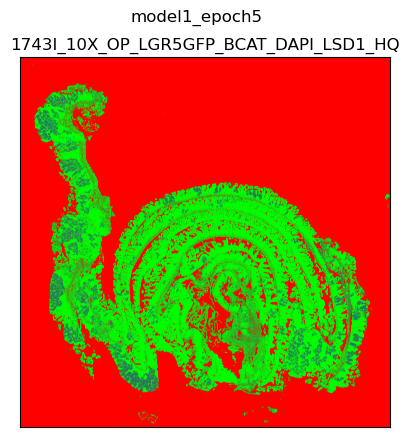

In [ ]:
#TEST: Display a single prediction of your choice
i=0
img = predictions[i]
plt.imshow(img)
# Remove the x-axis ticks and numbers
plt.xticks([])
# Remove the y-axis ticks and numbers
plt.yticks([])
plt.suptitle(model_name)
plt.title(f_test_images[i].stem)
plt.show()

0it [00:00, ?it/s]

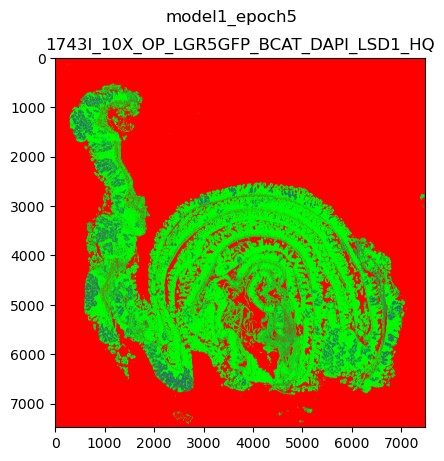

1it [00:07,  7.94s/it]

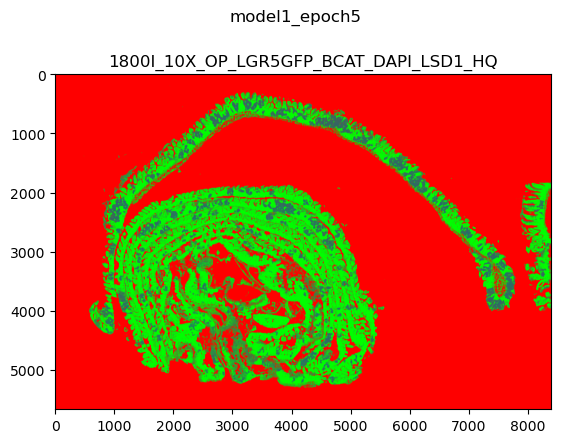

2it [00:15,  7.87s/it]


In [ ]:
# Create a directory to store the predictions
os.makedirs(f"prediction_tiffs/{model_name}")
# Loop through all the predictions, display and store them
for i, img in tqdm(enumerate(predictions)):
    img = predictions[i]
    plt.imshow(img)
    plt.suptitle(model_name)
    plt.title(f_test_images[i].stem)
    # Save the resulting prediction matplotlib plots
    plt.savefig(fname=f"prediction_tiffs/{model_name}/{f_test_images[i].stem}.png", dpi=300, format='png')
    plt.show()

# Save predictions as tiff files

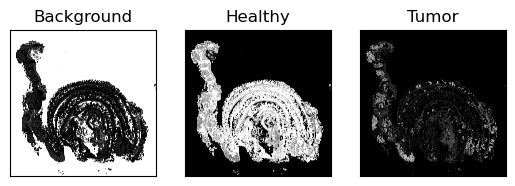

In [ ]:
i=0
from PIL import Image
os.mkdir(f"{f_test_images[i].stem}")

predictions[i].shape

# Assuming you have the ndarray of shape (1024, 1024, 3) stored in 'image_array'
image_array = predictions[i]

#Set the figure size
plt.figsize=(15,5)

# Display all 3 channels side by side
plt.subplot(1, 3, 1)
plt.imshow(image_array[:, :, 0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Background')

plt.subplot(1, 3, 2)
plt.imshow(image_array[:, :, 1], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Healthy')

plt.subplot(1, 3, 3)
plt.imshow(image_array[:, :, 2], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Tumor')

plt.show()

# Save each channel as a separate tiff file at full resolution
channel_names = ['Background', 'Healthy', 'Tumor']
for channel in range(3):
    channel_image = Image.fromarray(image_array[:, :, channel])
    channel_image.save(f'{f_test_images[i].stem}/{channel_names[channel]}.tiff')


In [ ]:
# Store the prediction as tiff files
os.makedirs(f"pred_tiffs_hq/{model_name}")
i=0
tifffile.imwrite(f"pred_tiffs_hq/{model_name}/{f_test_images[i].stem}_rgb.tiff", np.transpose(predictions[i], (2, 0, 1)))